<a href="https://colab.research.google.com/github/adele9244/P1/blob/main/ProjetMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   **Predicting Residential Property Prices in King County, Washington, Using Supervised Machine Learning**

---



***How can we predict the selling price of a house in Washington State based on its characteristics?***

# **Introduction**

**Business Case :**
Real estate is a dynamic and complex sector, where determining an accurate sale or purchase price is crucial for all stakeholders: buyers, sellers, agents, and financial institutions. King County in Washington, which includes the city of Seattle, is particularly relevant due to its rapid growth and significant market fluctuations.

The main objective of this project is to build a supervised machine learning model to predict the final sale price of a house in this region. This prediction will make it possible to:

- Quickly and objectively assess the market value of a home

- Identify undervalued or overvalued properties, providing a strategic advantage to investors

This project falls squarely within the field of finance/economics or data analysis, and its success will be measured by the accuracy of the price predictions.

# **Step 1 : Preparation and analysis**

- Importing and loading libraries (pandas, numpy, etc.)
- Importing datasets
- Creation of the final dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The dataset **HousePricingData** contains detailed information about 21,613 residential properties, providing a rich foundation for analyzing housing market trends and developing predictive models for real estate prices.

Each observation represents a single property sold, with variables describing its structural characteristics, location, and transaction details.

**General Information**

- id — A unique identifier assigned to each property record
- date — The sale date of the property

**Price Details**
- price — The sale price of the property (target variable). It reflects the market value at the time of sale and serves as the dependent variable in predictive models.

**Property Features**
- bedrooms — Total number of bedrooms in the property.
- bathrooms — Number of bathrooms, including partial bathrooms represented as fractions (e.g., 1.5 for one full and one half bathroom).
- sqft_living — Interior living area measured in square feet, representing the usable floor space inside the home.
- sqft_lot — Total lot area in square feet, including both the building and surrounding land.
- floors — Number of floors (levels) in the building.
- waterfront — Binary indicator specifying whether the property offers a waterfront view (Y/N).
- view — Quality score assessing the view from the property, with higher values indicating more desirable or scenic views.
- condition — Overall condition of the property based on maintenance and preservation (e.g., poor, average, excellent).
- grade — Construction and design quality grade, on a scale typically ranging from 1 to 13 (higher = better materials and finishes).

**Additional Metrics**
- sqft_above — Square footage of the house above ground level, excluding any basement area.
- sqft_basement — Square footage of the basement area, if present.
- yr_built — The year the property was originally constructed.
- yr_renovated — The year of the most recent renovation; 0 or missing values indicate no renovation.

**Location Coordinates**
- zipcode — The ZIP code identifying the property’s geographic area.
- lat — Latitude coordinate of the property location.
- long — Longitude coordinate of the property location.

**Neighbor Comparisons**
- sqft_living15 — Average living area (in square feet) of the 15 nearest neighboring properties, offering a measure of neighborhood housing size.
- sqft_lot15 — Average lot area (in square feet) of the 15 nearest neighboring properties, providing insight into local land use density.

In [ ]:
HousePricingData=pd.read_csv('HousePrincingDataset.csv', sep=";")
print(HousePricingData.head())
print(HousePricingData.columns)

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... grade  sqft_above  sqft_basement  \
0      5650     1.0          N     0  ...     7        1180              0   
1      7242     2.0          N     0  ...     7        2170            400   
2     10000     1.0          N     0  ...     6         770              0   
3      5000     1.0          N     0  ...     7        1050            910   
4      8080     1.0          N     0  ...     8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_liv

We also downloaded the dataset **zipcodes** in order to add the names of the cities from our HousePricingData dataset. This dataset contains the list of all the zipcodes in the US and there city name.

Since different zipcodes can refer to the same city, this added column is going to provide us with a more high level overview of the price variations in different areas.

In [ ]:
zipcodes=pd.read_csv('us_zips.csv', sep=";")
print(zipcodes.head())

     zip        city   state state_abbr          county  count_code  latitude  \
0  99553      Akutan  Alaska         AK  Aleutians East          13   54.1430   
1  99571    Cold Bay  Alaska         AK  Aleutians East          13   55.1858   
2  99583  False Pass  Alaska         AK  Aleutians East          13   54.8410   
3  99612   King Cove  Alaska         AK  Aleutians East          13   55.0628   
4  99661  Sand Point  Alaska         AK  Aleutians East          13   55.3192   

   longitude  
0  -165.7854  
1  -162.7211  
2  -163.4368  
3  -162.3056  
4  -160.4914  


In [ ]:
zipcodes_for_merge = zipcodes[['zip', 'city']].copy()

data_merged = pd.merge(HousePricingData,zipcodes_for_merge,left_on='zipcode',right_on='zip',how='inner')
data_merged.drop(columns=['zip'], inplace=True)

print("Aperçu du DataFrame fusionné:")
print(data_merged.head())
print("Nouvelles colonnes du dataset:")
print(data_merged.columns)

Aperçu du DataFrame fusionné:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... sqft_above  sqft_basement  yr_built  \
0      5650     1.0          N     0  ...       1180              0      1955   
1      7242     2.0          N     0  ...       2170            400      1951   
2     10000     1.0          N     0  ...        770              0      1933   
3      5000     1.0          N     0  ...       1050            910      1965   
4      8080     1.0          N     0  ...       1680              0      1987   

   yr_renovate

For each house sale we calculated the price per sqft it was sold to. We put this value in the column **sqft_price_per_house_calculated**.

In [ ]:
data_merged['sqft_price_per_house_calculated']=data_merged['price']/data_merged['sqft_living']
data_merged.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,sqft_price_per_house_calculated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle,188.050847
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle,209.338521
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore,233.766234
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle,308.163265
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish,303.571429


For each of the 70 different zipcodes we search the median listing home price per square feet. We used the website https://www.realtor.com/realestateandhomes-search/98117/overview and listed our values in a new file called **HousePrincingDataset_prix.csv**.

This dataset allows us to evaluate if the houses in our initial dataset were sold at prices above or under market prices.

However, these values are prices in 2025, whereas our initial dataset is from 2015. The prices are therefore not yet comparable.


In [ ]:
data_price2025=pd.read_csv('HousePrincingDataset_prix.csv', sep=";")
print(data_price2025.head())

   zipcode       City  sqft_price
0    98178    Seattle         401
1    98125    Seattle         486
2    98028    Kenmore         495
3    98136    Seattle         534
4    98074  Sammamish         633


In [ ]:
data_price2025.rename(columns={'sqft_price': 'med_sqft_price2025_byzip_online'}, inplace=True)

In [ ]:
df_final= pd.merge(data_merged,data_price2025[['zipcode', 'med_sqft_price2025_byzip_online']], left_on='zipcode', right_on='zipcode', how='left')

#Vérification
print("Aperçu du DataFrame fusionné (df_merged) :")
print(df_final.head())
print("\nListe des colonnes :")
print(df_final.columns)

Aperçu du DataFrame fusionné (df_merged) :
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... yr_built  yr_renovated  zipcode  \
0      5650     1.0          N     0  ...     1955             0    98178   
1      7242     2.0          N     0  ...     1951          1991    98125   
2     10000     1.0          N     0  ...     1933             0    98028   
3      5000     1.0          N     0  ...     1965             0    98136   
4      8080     1.0          N     0  ...     1987             0    98074   

       lat     long  sqft

In [ ]:
med_sqft_price2015_byzip_calculated=df_final.groupby('zipcode')['sqft_price_per_house_calculated'].median().reset_index()

med_sqft_price2015_byzip_calculated.rename(
    columns={'sqft_price_per_house_calculated': 'med_sqft_price2015_byzip_calculated'},
    inplace=True
)
df_final = pd.merge(df_final, med_sqft_price2015_byzip_calculated, on='zipcode', how='left')


print("New columns :")
print(df_final.columns)
print(df_final.head())

New columns :
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'city',
       'sqft_price_per_house_calculated', 'med_sqft_price2025_byzip_online',
       'med_sqft_price2015_byzip_calculated'],
      dtype='object')
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... yr_renovated  zipcode      lat  \
0      5650   

There average house sale price in King County, Washington, was multiplied by 2,665 between 2015 and 2025.

In order to know the median price/sqft of each zipcode in 2015, we divide the value we have for 2025 by 2.665.

In [ ]:
df_final['med_sqft_price2015_byzip_online']=df_final['med_sqft_price2025_byzip_online']/2.665
print(df_final.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... zipcode      lat     long  \
0      5650     1.0          N     0  ...   98178  47.5112 -122.257   
1      7242     2.0          N     0  ...   98125  47.7210 -122.319   
2     10000     1.0          N     0  ...   98028  47.7379 -122.233   
3      5000     1.0          N     0  ...   98136  47.5208 -122.393   
4      8080     1.0          N     0  ...   98074  47.6168 -122.045   

   sqft_living15  sqft_lot15       city  sqft_price_per_house_calculated  \
0           1340        5650

We transform our categorical variables into numerical ones in order to be able to apply different formulas and algorithms.
- For **waterfront** if there is, it's 1 if there is none, it's 0.
- For **condition**, it goes from poor (1) to very good (5).

We therefore add the columns  conditions_num and waterfront_num for the numerical values.


In [ ]:
unique_values_condition = df_final['condition'].unique()
print(unique_values_condition)

['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [ ]:
condition_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5
}

df_final['condition_num'] = df_final['condition'].replace(condition_mapping)

print(df_final[['condition', 'condition_num']].head())
#print(df_final['condition_num'].dtype)

   condition  condition_num
0    Average              3
1    Average              3
2    Average              3
3  Very Good              5
4    Average              3


/tmp/ipython-input-2255351473.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['condition_num'] = df_final['condition'].replace(condition_mapping)


In [ ]:
waterfront_mapping = {
    'N': 0,
    'Y': 1
}

df_final['waterfront_num'] = df_final['waterfront'].replace(waterfront_mapping)
df_final['waterfront_num'] = df_final['waterfront_num'].astype('int64')

print(df_final[['waterfront', 'waterfront_num']].head())

  waterfront  waterfront_num
0          N               0
1          N               0
2          N               0
3          N               0
4          N               0


/tmp/ipython-input-2876640381.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['waterfront_num'] = df_final['waterfront'].replace(waterfront_mapping)


After adding all the columns we need, we extract the data into a new csv file.


In [ ]:
output_filename = 'KingCounty_HousePricing_with_ZipMedian.csv'

try:
    df_final.to_csv(
        output_filename,
        index=False,
        sep=';'
    )
    print(f"Le DataFrame a été sauvegardé avec succès dans le fichier : {output_filename}")
    print(f"Le fichier est prêt à être téléchargé ou utilisé.")

except Exception as e:
    print(f"Erreur lors de la sauvegarde du fichier : {e}")

Le DataFrame a été sauvegardé avec succès dans le fichier : KingCounty_HousePricing_with_ZipMedian.csv
Le fichier est prêt à être téléchargé ou utilisé.


# **Step 2 : Data Pre-processing:**
- Management of outliers (aberrant values).

- Encoding of categorical variables (e.g., waterfront, postcode).

- Scaling of numerical variables (e.g., sqft_living).

- Separation into training/test sets (train-test split).

In [ ]:
df=df_final.copy()

In [ ]:
print(f"Number of duplicates : {df.duplicated().sum()}")

print(f"Number of missing values per column :")
print(df.isnull().sum())

Number of duplicates : 0
Number of missing values per column :
id                                     0
date                                   0
price                                  0
bedrooms                               0
bathrooms                              0
sqft_living                            0
sqft_lot                               0
floors                                 0
waterfront                             0
view                                   0
condition                              0
grade                                  0
sqft_above                             0
sqft_basement                          0
yr_built                               0
yr_renovated                           0
zipcode                                0
lat                                    0
long                                   0
sqft_living15                          0
sqft_lot15                             0
city                                   0
sqft_price_per_house_calculated    

There are no duplicates or missing values, our dataset is ready.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   21613 non-null  int64  
 1   date                                 21613 non-null  object 
 2   price                                21613 non-null  float64
 3   bedrooms                             21613 non-null  int64  
 4   bathrooms                            21613 non-null  float64
 5   sqft_living                          21613 non-null  int64  
 6   sqft_lot                             21613 non-null  int64  
 7   floors                               21613 non-null  float64
 8   waterfront                           21613 non-null  object 
 9   view                                 21613 non-null  int64  
 10  condition                            21613 non-null  object 
 11  grade                       

The only variable that is not numerical is the city name, so we don't need to modify any variable type.

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,sqft_price_per_house_calculated,med_sqft_price2025_byzip_online,med_sqft_price2015_byzip_calculated,med_sqft_price2015_byzip_online,condition_num,waterfront_num
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,7.656873,1788.390691,...,47.560053,-122.213896,1986.552492,12768.455652,264.156594,510.972887,253.737582,191.734667,3.409430,0.007542
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,1.175459,828.090978,...,0.138564,0.140828,685.391304,27304.179631,110.060793,140.630770,78.941787,52.769520,0.650743,0.086517
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,...,47.155900,-122.519000,399.000000,651.000000,87.588235,314.000000,144.970414,117.823640,1.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,...,47.471000,-122.328000,1490.000000,5100.000000,182.291667,401.000000,181.422925,150.469043,3.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,7.000000,1560.000000,...,47.571800,-122.230000,1840.000000,7620.000000,244.644550,500.000000,250.824176,187.617261,3.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,8.000000,2210.000000,...,47.678000,-122.125000,2360.000000,10083.000000,318.322981,599.000000,302.631579,224.765478,4.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,9410.000000,...,47.777600,-121.315000,6210.000000,871200.000000,810.138889,1500.000000,565.165614,562.851782,5.000000,1.000000


In [ ]:
print("\nQuick Check of our dataset")

print(f"Price :")
print(f"Average : ${df['price'].mean():,.0f}")
print(f"Median : ${df['price'].median():,.0f}")
print(f"Min : ${df['price'].min():,.0f}")
print(f"Max : ${df['price'].max():,.0f}")

print(f"\nLiving space :")
print(f"Average : {df['sqft_living'].mean():.0f} sqft")
print(f"Median : {df['sqft_living'].median():.0f} sqft")

print(f"\nAverage characteristics :")
print(f"Rooms : {df['bedrooms'].mean():.1f}")
print(f"bathroom : {df['bathrooms'].mean():.1f}")
print(f"floors : {df['floors'].mean():.1f}")

print(f"\nSquarefeet price :")
print(f"Average : ${df['sqft_price_per_house_calculated'].mean():.0f}")
print(f"Median : ${df['sqft_price_per_house_calculated'].median():.0f}")

print(f"\nConstruction year:")
print(f"Oldest : {df['yr_built'].min()}")
print(f"Earliest : {df['yr_built'].max()}")
print(f"Average : {df['yr_built'].mean():.0f}")

print(f"\nWaterfront view:")
print(df['waterfront_num'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

print(f"\nView:")
print(f"Average view quality : {df['view'].mean():.2f} /4")

print(f"\nGrade:")
print(f"Average grade : {df['grade'].mean():.2f} /13")



Quick Check of our dataset
Price :
Average : $540,088
Median : $450,000
Min : $75,000
Max : $7,700,000

Living space :
Average : 2080 sqft
Median : 1910 sqft

Average characteristics :
Rooms : 3.4
bathroom : 2.1
floors : 1.5

Squarefeet price :
Average : $264
Median : $245

Construction year:
Oldest : 1900
Earliest : 2015
Average : 1971

Waterfront view:
waterfront_num
0    99.2%
1     0.8%
Name: proportion, dtype: object

View:
Average view quality : 0.23 /4

Grade:
Average grade : 7.66 /13


# **Step 3:Analysis**

- Exploratory Data Analysis (EDA):

- Checking the number of rows and columns, and the type of variables.

- Analysis of the distribution of the target : Price

- Correlation analysis (e.g., correlation between sqft_living and price).
- Analyse the imbalance issue in our dataset (lab4)



In [ ]:
df.shape

(21613, 28)

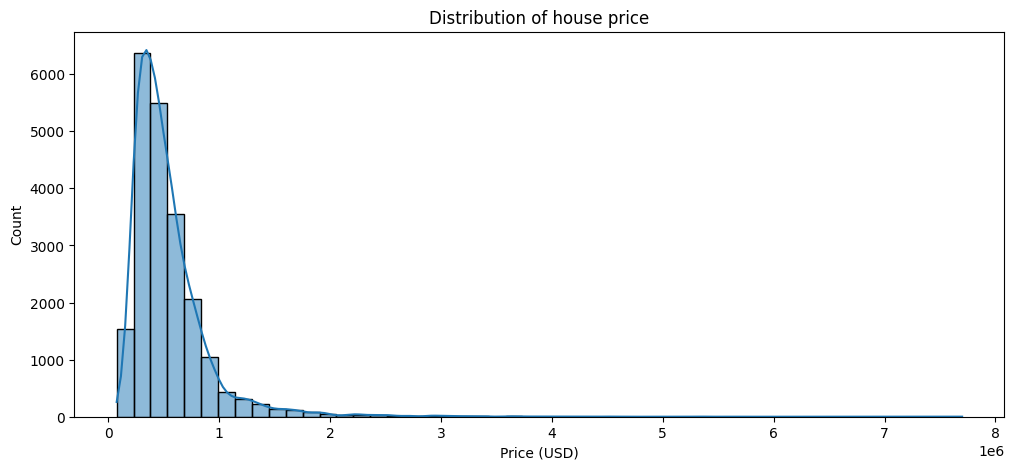

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of house price')
plt.xlabel('Price (USD)')
plt.show()

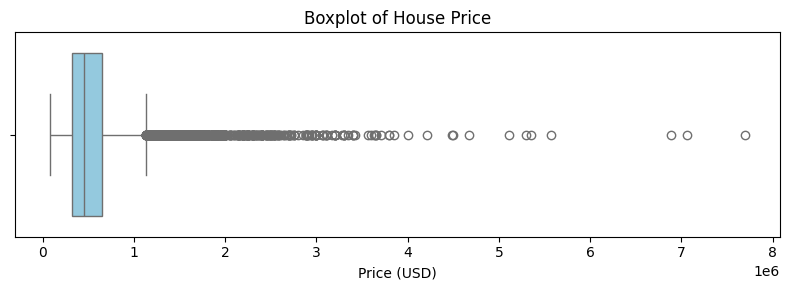

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Boxplot of House Price')
plt.xlabel('Price (USD)')
plt.tight_layout()
plt.show()

In [ ]:
print(f"Median price : {df['price'].median():.0f}")
print(f"Minimum price : {df['price'].min():.0f}")
print(f"Maximum price : {df['price'].max():.0f}")
print(f"Average price : {df['price'].mean():.0f}")


Median price : 450000
Minimum price : 75000
Maximum price : 7700000
Average price : 540088


The distribution and boxplot of house prices clearly show that the variable is strongly **right-skewed**, meaning most properties are sold at relatively moderate prices, while a small number of very expensive homes significantly raise the upper tail of the distribution. The histogram indicates that the majority of sales are concentrated below one million dollars, with a steep decline in frequency as price increases. This pattern is confirmed by the boxplot, where the box (representing the interquartile range) is compressed near the lower end of the scale, and numerous outliers extend far to the right, reaching prices up to seven million dollars.

Although the **average price is 540,088 dollars**, this value does not reflect the typical property in the dataset because it is heavily influenced by these few high-value outliers. The **median price is 450,000 dollars**, providing a more representative measure of the “typical” home value. Overall, these graphs highlight a highly unequal price distribution within the housing market, where a minority of luxury properties drive up the mean while most houses remain within a much narrower and lower price range.

We are going to extract the houses that we sold for over 3,000,000$ to see what are the driving features for the price increase.

In [ ]:
expensive_house = df[df['price'] > 3000000].copy()
expensive_house.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,sqft_price_per_house_calculated,med_sqft_price2025_byzip_online,med_sqft_price2015_byzip_calculated,med_sqft_price2015_byzip_online,condition_num,waterfront_num
count,4.500000e+01,4.500000e+01,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,4.589311e+09,3.910794e+06,4.600000,4.505556,6255.777778,23717.666667,1.877778,2.666667,11.466667,4792.888889,...,47.624284,-122.228222,3711.177778,19773.466667,639.853840,863.111111,396.584110,323.869085,3.444444,0.444444
std,2.976511e+09,1.110723e+06,1.194685,1.320177,1863.304114,12700.445203,0.565641,1.732051,1.013545,1629.670382,...,0.044215,0.070671,647.660941,10588.145506,105.144635,312.964580,101.307621,117.435114,0.659047,0.502519
min,2.515001e+08,3.065000e+06,2.000000,1.750000,3920.000000,7500.000000,1.000000,0.000000,8.000000,2090.000000,...,47.534800,-122.408000,2250.000000,4050.000000,411.471322,462.000000,234.949664,173.358349,3.000000,0.000000
25%,2.424049e+09,3.200000e+06,4.000000,3.500000,4830.000000,13363.000000,2.000000,1.000000,11.000000,3510.000000,...,47.604200,-122.241000,3160.000000,13287.000000,565.591398,640.000000,291.935484,240.150094,3.000000,0.000000
50%,3.760500e+09,3.418800e+06,5.000000,4.500000,5550.000000,20412.000000,2.000000,4.000000,12.000000,4810.000000,...,47.623200,-122.220000,3720.000000,18270.000000,667.244367,824.000000,391.050584,309.193246,3.000000,0.000000
75%,7.397300e+09,4.000000e+06,5.000000,5.250000,7100.000000,28206.000000,2.000000,4.000000,12.000000,5760.000000,...,47.639500,-122.211000,4190.000000,23408.000000,717.131474,955.000000,456.944444,358.348968,4.000000,1.000000
max,9.808701e+09,7.700000e+06,8.000000,8.000000,12050.000000,56609.000000,3.500000,4.000000,13.000000,8860.000000,...,47.749300,-122.077000,5070.000000,51330.000000,798.122066,1500.000000,565.165614,562.851782,5.000000,1.000000


In [ ]:
not_expensive_house = df[df['price'] <= 3000000].copy()
not_expensive_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,sqft_price_per_house_calculated,med_sqft_price2025_byzip_online,med_sqft_price2015_byzip_calculated,med_sqft_price2015_byzip_online,condition_num,waterfront_num
count,2.156800e+04,2.156800e+04,21568.000000,21568.000000,21568.000000,2.156800e+04,21568.000000,21568.000000,21568.000000,21568.000000,...,21568.000000,21568.000000,21568.000000,21568.000000,21568.000000,21568.000000,21568.000000,21568.000000,21568.000000,21568.000000
mean,4.580283e+09,5.330554e+05,3.368277,2.109769,2071.187083,1.508900e+04,1.493509,0.229228,7.648924,1782.122033,...,47.559919,-122.213867,1982.954191,12753.840226,263.372730,510.238177,253.439543,191.458978,3.409356,0.006630
std,2.876425e+09,3.298346e+05,0.927766,0.760843,895.404902,4.145786e+04,0.539663,0.754968,1.162817,814.170026,...,0.138663,0.140938,680.930744,27326.588627,108.724305,139.137274,78.620642,52.209108,0.650739,0.081157
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,...,47.155900,-122.519000,399.000000,651.000000,87.588235,314.000000,144.970414,117.823640,1.000000,0.000000
25%,2.123049e+09,3.210000e+05,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,...,47.470300,-122.328000,1490.000000,5100.000000,182.191813,401.000000,181.422925,150.469043,3.000000,0.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.606000e+03,1.500000,0.000000,7.000000,1560.000000,...,47.571550,-122.231000,1840.000000,7620.000000,244.444444,500.000000,245.212571,187.617261,3.000000,0.000000
75%,7.308900e+09,6.410000e+05,4.000000,2.500000,2540.000000,1.064050e+04,2.000000,0.000000,8.000000,2202.750000,...,47.678100,-122.125000,2360.000000,10071.750000,317.777778,599.000000,302.631579,224.765478,4.000000,0.000000
max,9.900000e+09,3.000000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,9410.000000,...,47.777600,-121.315000,6210.000000,871200.000000,810.138889,1500.000000,565.165614,562.851782,5.000000,1.000000


The comparison between houses sold for more than 3 million dollars and those sold for less than 3 million highlights clear structural and qualitative differences.

Expensive houses are, on average, three times larger in living area (around 6,200 sqft versus 2,000 sqft) and have higher overall grades (11.5 compared to 7.6). They also feature twice as much bathrooms and slightly more bedrooms, confirming that both size and interior quality play a major role in price escalation.
These high-end properties often have larger lots and better views, with about 44 % located near the waterfront, while almost none of the lower-priced homes have such amenities.

Interestingly, some factors such as the overall condition of the house and number of floors do not vary dramatically between the two groups, suggesting that beyond a certain threshold, these characteristics have limited impact on price.

Overall, the strongest drivers of very high prices are living space, construction quality, and premium location features (especially waterfront and view), while general condition or floor count have relatively minor influence.

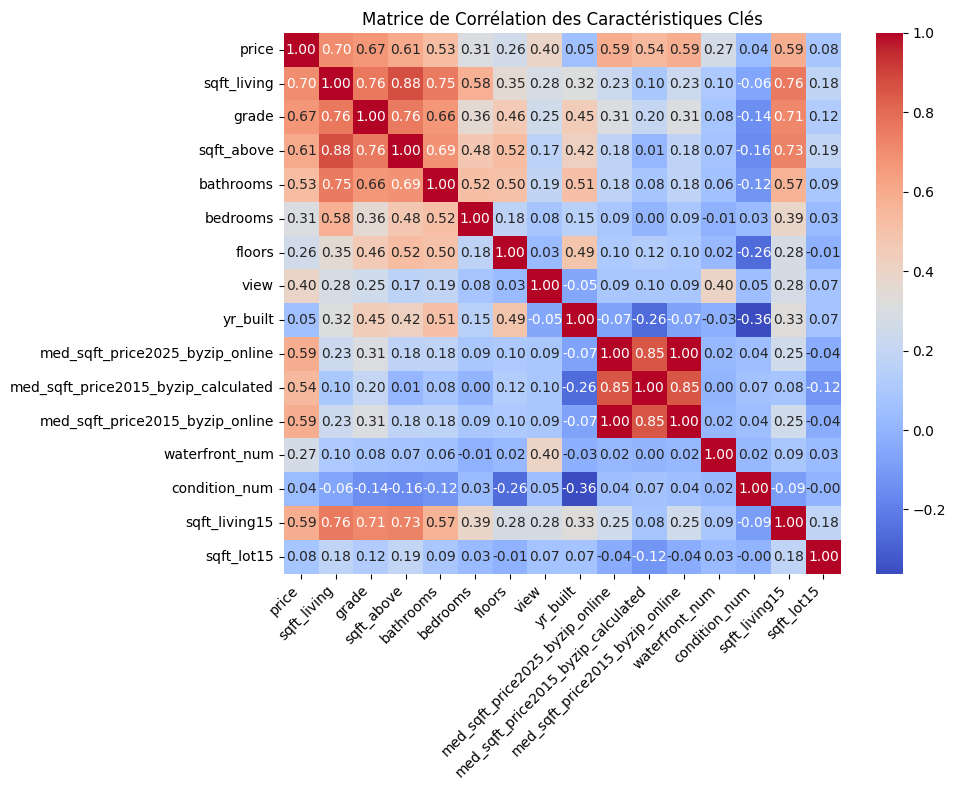

In [ ]:
numeric_cols_for_corr = [
    'price',
    'sqft_living',
    'grade',
    'sqft_above',
    'bathrooms',
    'bedrooms',
    'floors',
    'view',
    'yr_built',
    'med_sqft_price2025_byzip_online',
    'med_sqft_price2015_byzip_calculated',
    'med_sqft_price2015_byzip_online',
    'waterfront_num',
    'condition_num',
    'sqft_living15',
    'sqft_lot15',
]


correlation_matrix = df[numeric_cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.title('Matrice de Corrélation des Caractéristiques Clés')
plt.tight_layout()
plt.show()

The **correlation matrix** reveals that a few key variables dominate the relationship with house **prices**. The living space area (**sqft_living**) shows the strongest positive correlation with price, indicating that larger houses tend to sell for significantly higher values. This relationship is reinforced by **grade**, which captures the overall quality of construction and design, and by **sqft_above**, representing the above-ground living area—both are strongly associated with higher prices. These three features move closely together, reflecting that better quality homes are generally larger and therefore more expensive.

Other influential variables include the number of **bathrooms** and the average size of neighboring properties (**sqft_living15**), both showing moderate positive correlations. This suggests that not only the size and quality of a house but also the general characteristics of nearby homes contribute to its market value. In contrast, variables such as **condition, floors**, and **year built** display weak correlations, indicating that they alone do not explain much of the variation in price.

A particularly notable pattern appears among the **zipcode-based median price features** (med_sqft_price2015_byzip_online, med_sqft_price2015_byzip_calculated, and med_sqft_price2025_byzip_online), which are extremely correlated with each other and also show strong associations with price. These features capture the influence of location and local market conditions, but they may also introduce redundancy or potential data leakage if not handled carefully. Overall, the correlations highlight that **size, quality, and location are the most decisive factors** driving house prices, while many structural attributes contribute only marginally.

Across the other features, two tight correlation clusters stand out. First is the size/quality cluster: **sqft_living, sqft_above, bathrooms, grade**, and to a lesser extent **sqft_living15** move strongly together. Larger homes tend to devote more area above ground, include more bathrooms, and receive higher construction/design grades; neighborhoods with larger average homes (**sqft_living15**) reinforce this pattern.

A secondary but important cluster is the location-price group: the **three zipcode-level median price-per-sqft features**(med_sqft_price2015_byzip_online, med_sqft_price2015_byzip_calculated, med_sqft_price2025_byzip_online) are extremely correlated with each other because they encode essentially the same market signal at slightly different sources/times.

Outside these clusters, **most other pairwise relationships are modest**, with bedrooms largely riding on overall size rather than adding distinct signal, and variables like yr_built, floors, and condition_num showing weaker, less collinear structure that likely manifests through non-linear effects rather than strong linear ties.

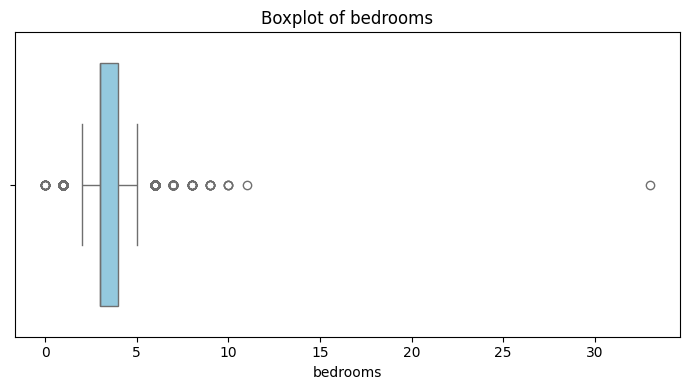

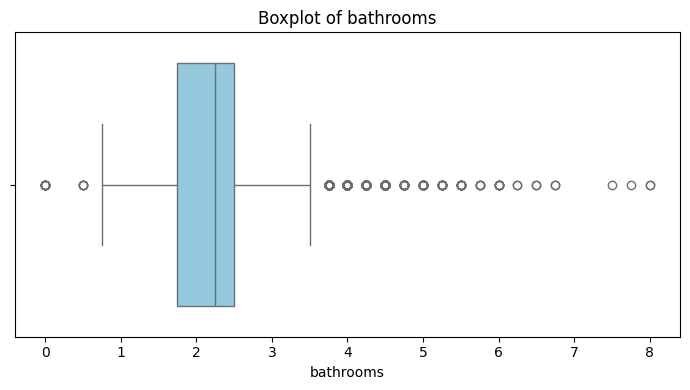

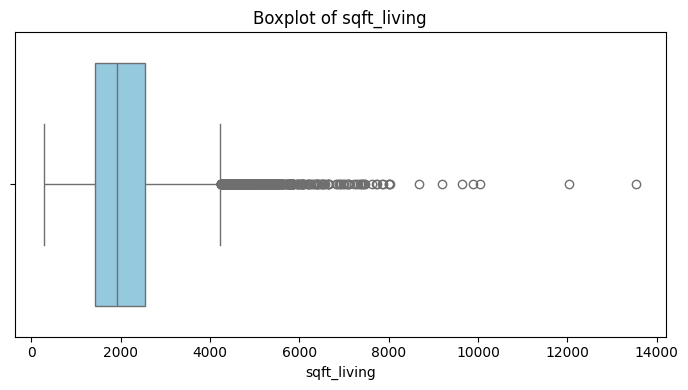

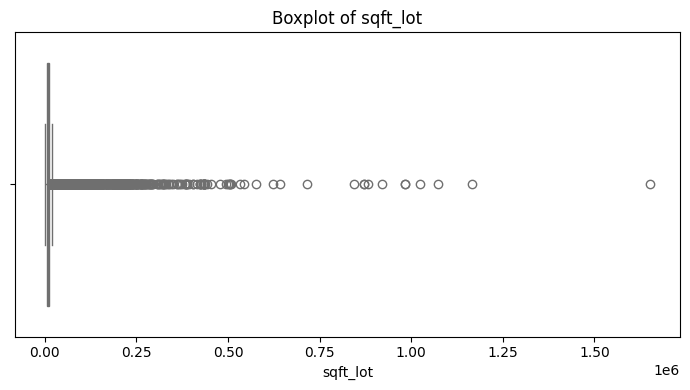

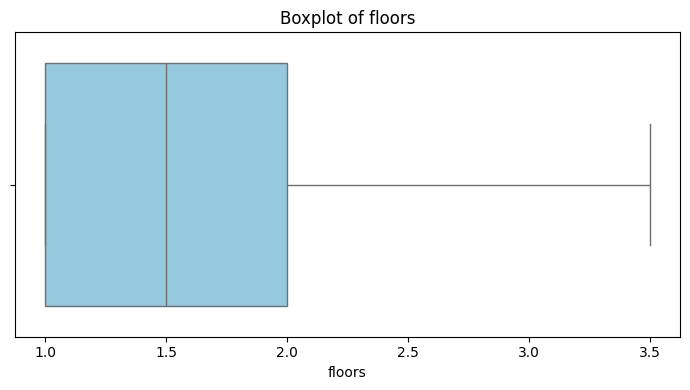

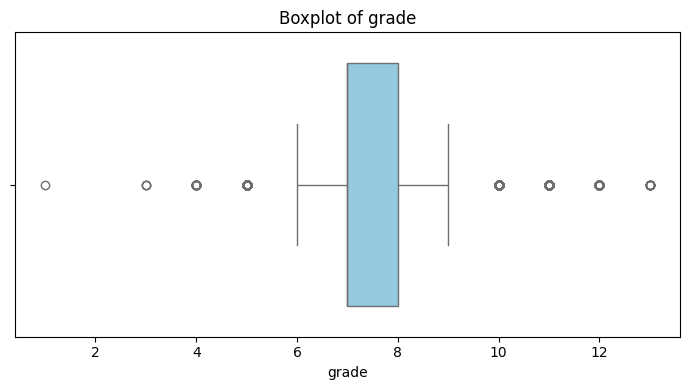

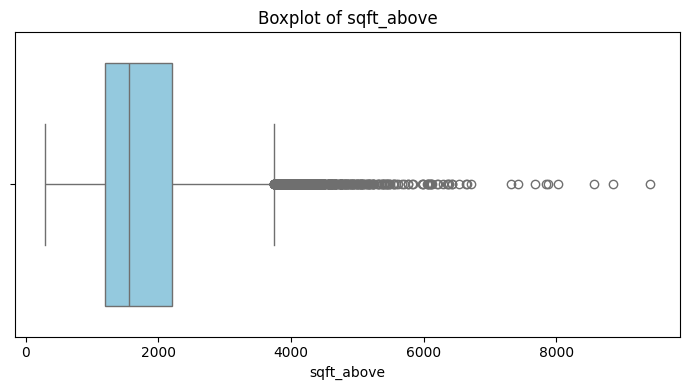

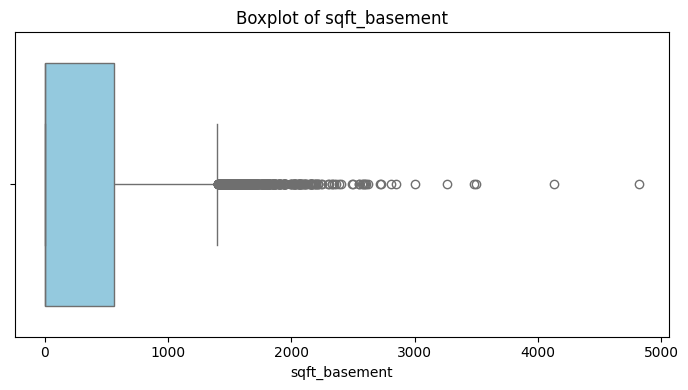

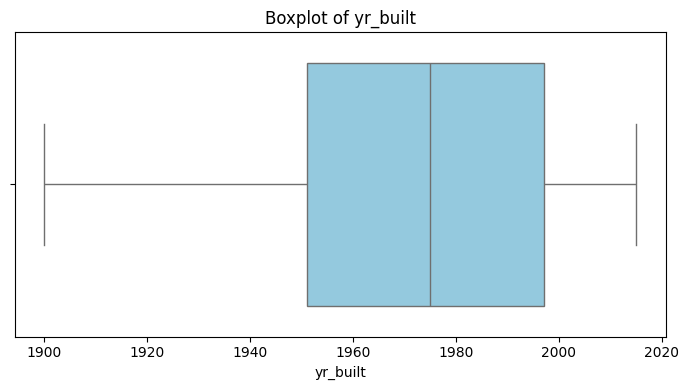

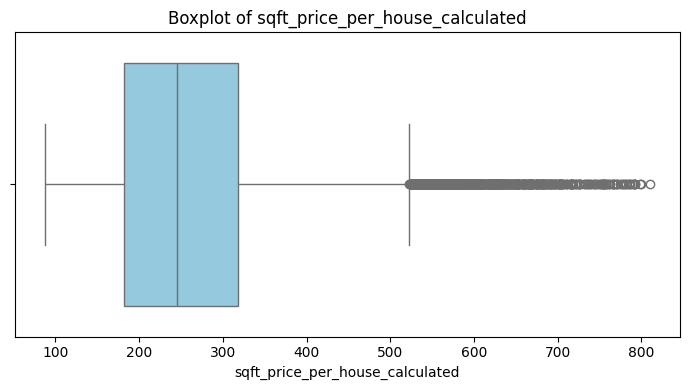

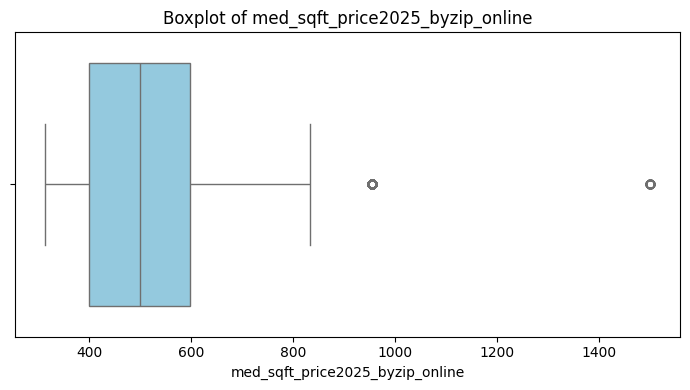

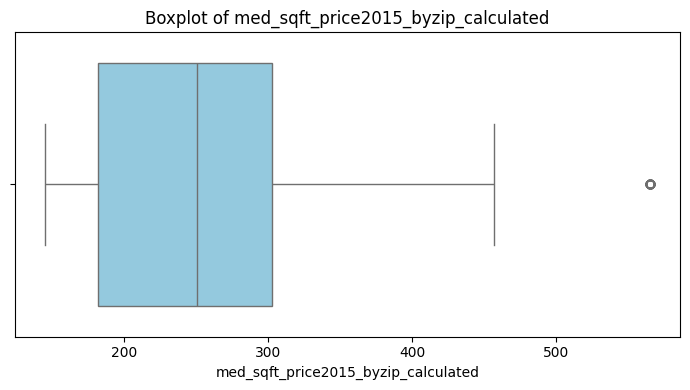

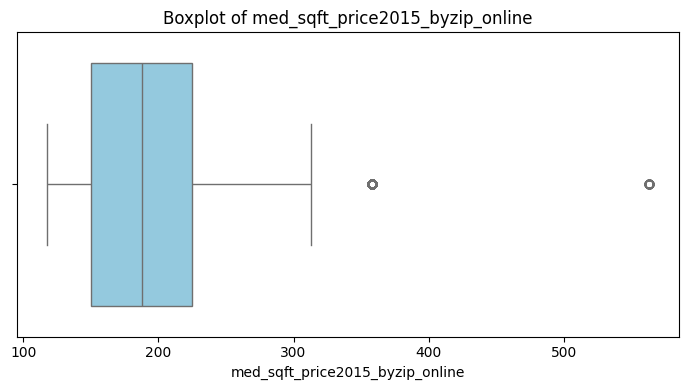

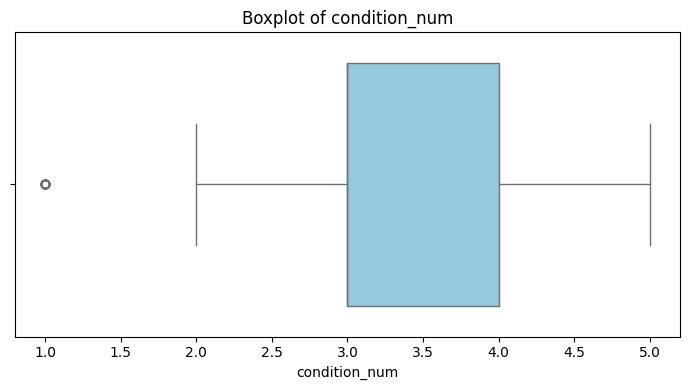

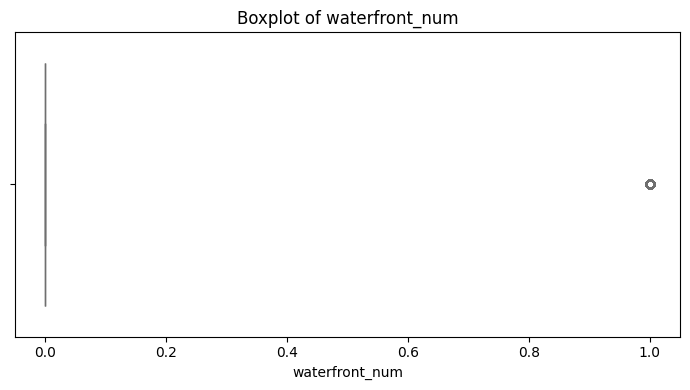

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

cols_to_plot = [col for col in numeric_cols if col not in ['id','price','zipcode','sqft_lot15', 'sqft_living15','long','lat','yr_renovated','view']]

for col in cols_to_plot:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


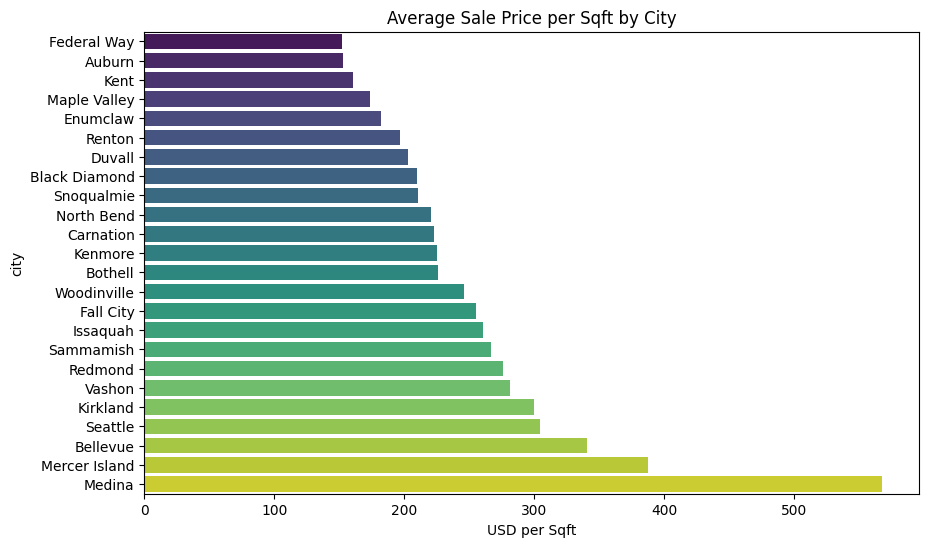

In [ ]:
# in this graph the price value is the actual one of the sale. It was calculated by dividing the price by the surface.
#The houses were actually sold at those prices

avg_price_sqft_city = (df.groupby('city')['sqft_price_per_house_calculated']
      .mean()
      .sort_values(ascending=True))

plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_price_sqft_city.values,
    y=avg_price_sqft_city.index,
    hue=avg_price_sqft_city.index,
    palette='viridis')

plt.title('Average Sale Price per Sqft by City')
plt.xlabel('USD per Sqft')
plt.show()

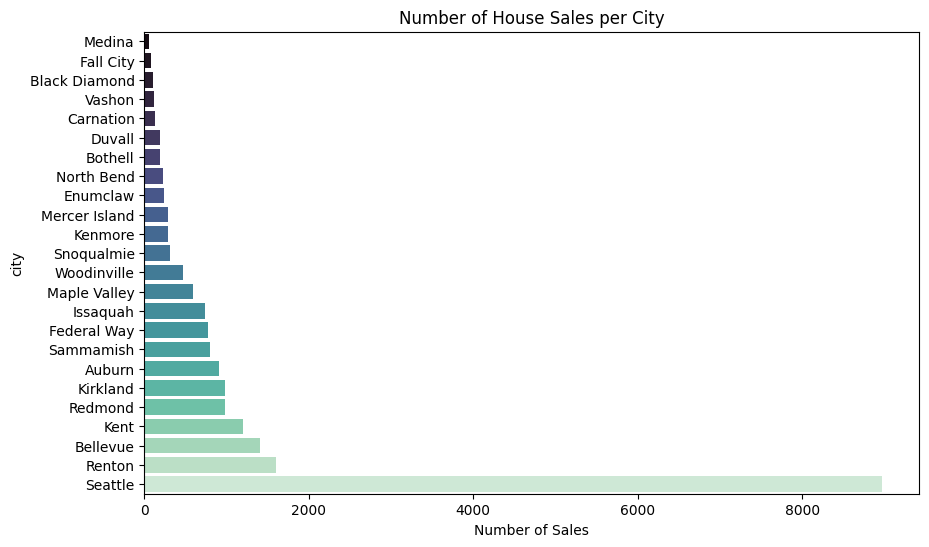

In [ ]:
sales_per_city = (df['city']
    .value_counts()
    .sort_values(ascending=True))

plt.figure(figsize=(10, 6))
sns.barplot(
    x=sales_per_city.values,
    y=sales_per_city.index,
    hue=sales_per_city.index,
    palette='mako')

plt.title('Number of House Sales per City')
plt.xlabel('Number of Sales')
plt.show()

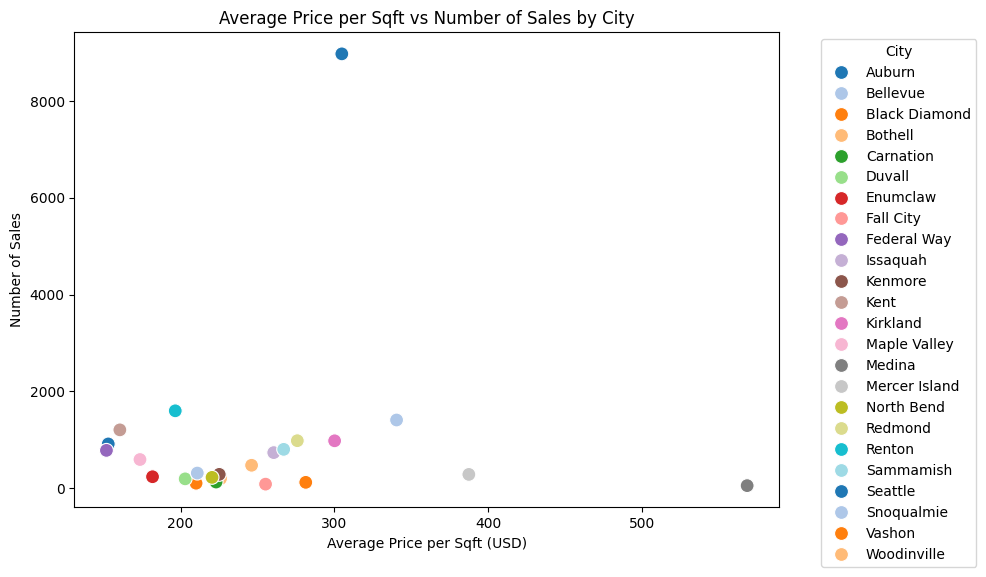

In [ ]:
# Graph to determine if the number of house sales is proportionate to the price per sqft

city_stats = (df.groupby('city')
      .agg(
          avg_price_sqft=('sqft_price_per_house_calculated', 'mean'),
          num_sales=('city', 'count'))
      .reset_index())


plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=city_stats,
    x='avg_price_sqft',
    y='num_sales',
    hue='city',
    palette='tab20',
    s=100)

plt.title('Average Price per Sqft vs Number of Sales by City')
plt.xlabel('Average Price per Sqft (USD)')
plt.ylabel('Number of Sales')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='City')
plt.tight_layout()
plt.show()


The first graph illustrates the average sale price per square foot by city, clearly highlighting the differences in housing market value across the region. Cities like Medina, Mercer Island, and Bellevue stand out with the highest average prices per square foot, exceeding 400–500 dollars, reflecting their exclusive and high-end residential profiles. In contrast, cities such as Federal Way, Auburn, and Kent show much lower prices, around 150–200 dollars per square foot, indicating more affordable and accessible housing markets.

This price disparity underlines a strong geographic segmentation between luxury coastal or central areas and more suburban or working-class zones.
The second graph focuses on the number of house sales per city, revealing a completely different hierarchy. Here, Seattle dominates the market with an exceptionally high number of sales, followed by Renton, Bellevue, and Kent. These cities have dense populations and large real-estate markets, which explains their transaction volumes. On the other hand, premium locations such as Medina or Mercer Island record far fewer sales, consistent with their smaller size, higher property values, and more limited supply. This graph confirms that real-estate activity is heavily concentrated in large metropolitan areas.

Finally, the third graph, which combines both metrics, visually shows the relationship between average price per square foot (x-axis) and number of sales (y-axis). Most cities cluster at moderate price and sales levels, while Seattle stands apart with an exceptionally high sales volume but only average price levels. In contrast, luxury areas like Medina and Mercer Island appear on the far right — expensive but with few transactions. This pattern highlights the market’s dual structure: high-density, mid-priced urban markets coexist with small, high-value luxury enclaves, however there is no clear correlation between the number of sales and the price per sqft.

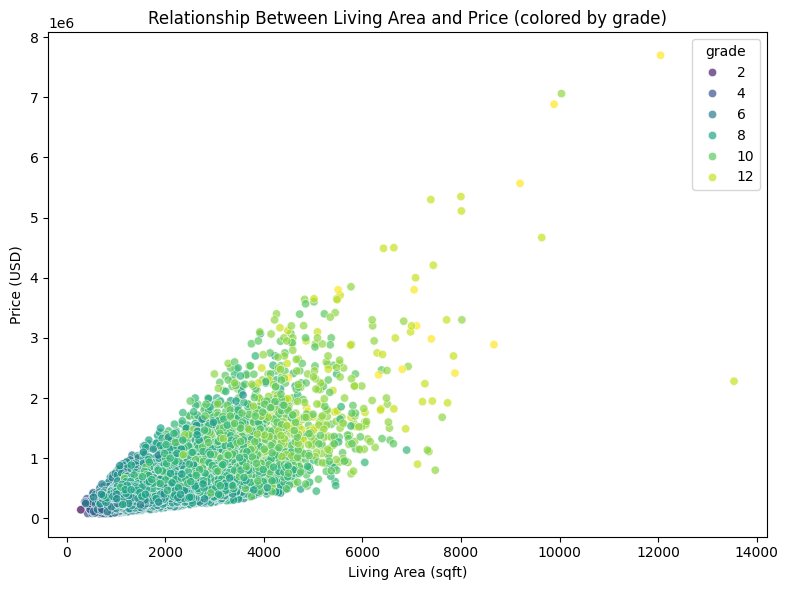

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='grade', palette='viridis', alpha=0.7)
plt.title('Relationship Between Size and Price (colored by grade)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()


This scatter plot shows a clear positive relationship between living area (sqft) and house price: larger homes generally sell for higher prices. The color scale, which represents the grade of construction and design, reinforces this trend — higher-grade houses (in yellow and green) are consistently located in the upper-right region, meaning they are both larger and more expensive. Conversely, smaller homes with lower grades (in blue and purple) cluster near the lower-left corner, indicating modest size and price.

Overall, the graph highlights that both size and construction quality strongly influence property value, with grade acting as a multiplier of price for a given living area.

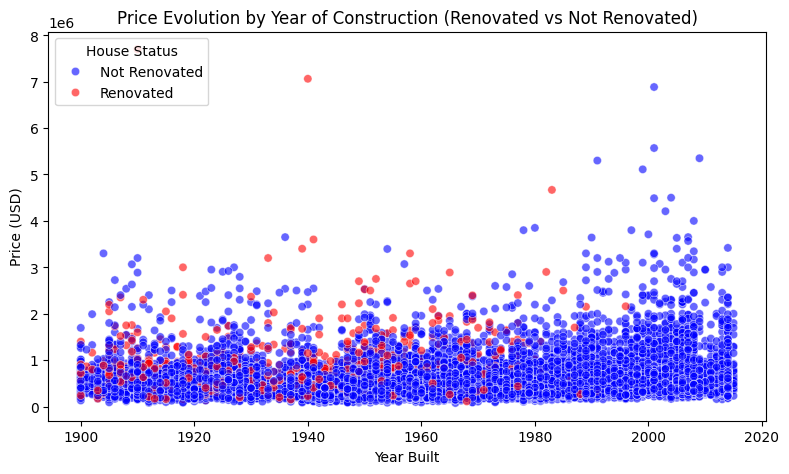

In [ ]:
plt.figure(figsize=(8,5))

sns.scatterplot(data=df,
    x='yr_built',
    y='price',
    hue=df['yr_renovated'].apply(lambda x: 'Renovated' if x != 0 else 'Not Renovated'),
    palette={'Renovated': 'red', 'Not Renovated': 'blue'},
    alpha=0.6)

plt.title('Price Evolution by Year of Construction (Renovated vs Not Renovated)')
plt.xlabel('Year Built')
plt.ylabel('Price (USD)')
plt.legend(title='House Status', loc='upper left')
plt.tight_layout()
plt.show()


# **Step4: Implementation of different model**

1) Linear regression
2) Polynomial regression
3) knn
4) SVM
5) Decision tree
6) Logistic regression
7) PCA